In [10]:
import math
import numpy as np
import sympy as sm
from sympy import Derivative, diff
import itertools
from itertools import groupby
import matplotlib.pyplot as plt
from tabulate import tabulate
from pprint import pprint

from IPython.display import display, Latex, clear_output

In [2]:
sm.init_printing(use_latex='mathjax')
x, y, t = sm.symbols('x, y, t', real=True)
C1, C2 = sm.symbols("C1, C2", real=True)
c = sm.symbols("c")
u = sm.Function('u')
ux = u(x)
ux1 = Derivative(u(x), x)
ux2 = Derivative(u(x), (x, 2))

h, uup1, uum1, uu0 = sm.symbols('h, u_i+1, u_i-1, u_i')

uup1, uum1, uu0

(uᵢ₊₁, uᵢ₋₁, uᵢ)

In [3]:
zad1 = {
    'a': 0, 'b': 2,
    'k': 0.5, 'T': 0.4,
    'fx': sm.lambdify(x, 1), 'fxt': 2, 'lambda_fxt': sm.lambdify([x, t], 2),
    'g1t': sm.lambdify(t, sm.exp(-t)), 'g2t': sm.lambdify(t, sm.exp(-5*t))
    
}

In [14]:
n = 9
m = 10
#hh = (zad1['b'] - zad1['a']) / (n-1)
#tt = zad1['T'] / (m-1)
#bb = zad1['k'] * tt / hh**2
#uut1 = (uu0 - y)/(t)
#uux2 = (uup1 - 2*uu0 + uum1)/(h**2)
#apro = sm.Eq(uut1, zad1['k']*uux2 + zad1['fxt'])

#us = sm.symbols(' '.join([f"u{i}" for i in range(n)]))
#list_x = [zad1['a'] + hh*i for i in range(n)]
#list_tt = [tt*i for i in range(m)]
#list_g1t = [zad1['g1t'](list_tt[i]) for i in range(m)]
#list_g2t = [zad1['g2t'](list_tt[i]) for i in range(m)]

#print(hh, tt)
#display(uut1, uux2)
#display(apro)
#print(us)
#print("list_x:", *list_x)
#print("list_tt:", *list_tt)
#print("list_g1t:", *list_g1t)
#print("list_g2t:", *list_g2t)

In [12]:
def get_tables(m, n):
    hh = (zad1['b'] - zad1['a']) / (n-1)
    tt = zad1['T'] / (m-1)
    bb = zad1['k'] * tt / hh**2
    uut1 = (uu0 - y)/(t)
    uux2 = (uup1 - 2*uu0 + uum1)/(h**2)
    apro = sm.Eq(uut1, zad1['k']*uux2 + zad1['fxt'])

    us = sm.symbols(' '.join([f"u{i}" for i in range(n)]))
    list_x = [zad1['a'] + hh*i for i in range(n)]
    list_tt = [tt*i for i in range(m)]
    list_g1t = [zad1['g1t'](list_tt[i]) for i in range(m)]
    list_g2t = [zad1['g2t'](list_tt[i]) for i in range(m)]
    
    table = np.zeros((m,n))
    for i in range(m):
        table[i][0] = list_g1t[i]
        table[i][n-1] = list_g2t[i]
    for i in range(1, n-1):
        table[0][i] = zad1['fx'](list_x[i])

    table1 = np.copy(table)
    table2 = np.copy(table)

    for i in range(1, m):
        for j in range(1, n-1):
            table1[i][j] = bb*(table1[i-1][j-1] + table1[i-1][j+1] - 2*table1[i-1][j]) + table1[i-1][j] + tt*zad1['lambda_fxt'](list_x[j], list_tt[i])
    for i in range(1, m):
        tyts = [apro.subs({x: list_x[j], y: table2[i-1][j], h: hh, t: tt, uum1: us[j-1], uu0: us[j], uup1: us[j+1]})  for j in range(1,n-1)]
        tyts.append(sm.Eq(us[0], table2[i][0]))
        tyts.append(sm.Eq(us[n-1], table2[i][n-1]))
        #display(*tyts)
        result = list(sm.solve(tyts, us).values())
        #print()
        #display(*result)
        #break
        for j in range(1, n-1):
            table2[i][j] = result[j]
    return table1, table2, {'hh': hh, 'tt': tt, 'list_x': list_x, 'list_tt': list_tt}

In [15]:
table1, table2, args = get_tables(m, n)
print(tabulate(table1, floatfmt=".4"))
print(tabulate(table2, floatfmt=".4"))

------  -----  -----  -----  -----  -----  -----  ------  ------
1.0     1.0    1.0    1.0    1.0    1.0    1.0    1.0     1.0
0.9565  1.089  1.089  1.089  1.089  1.089  1.089  1.089   0.8007
0.9149  1.131  1.178  1.178  1.178  1.178  1.178  1.075   0.6412
0.8752  1.16   1.25   1.267  1.267  1.267  1.23   1.046   0.5134
0.8371  1.179  1.313  1.35   1.356  1.343  1.267  1.011   0.4111
0.8007  1.194  1.367  1.427  1.438  1.409  1.292  0.9775  0.3292
0.7659  1.205  1.416  1.499  1.513  1.466  1.311  0.9476  0.2636
0.7326  1.213  1.459  1.563  1.58   1.516  1.326  0.9224  0.2111
0.7008  1.219  1.497  1.621  1.64   1.56   1.339  0.9018  0.169
0.6703  1.222  1.531  1.673  1.694  1.599  1.351  0.8856  0.1353
------  -----  -----  -----  -----  -----  -----  ------  ------
------  -----  -----  -----  -----  -----  -----  ------  ------
1.0     1.0    1.0    1.0    1.0    1.0    1.0    1.0     1.0
0.9565  1.06   1.083  1.087  1.088  1.086  1.075  1.026   0.8007
0.9149  1.102  1.157  1.172  1.1

In [16]:
table3 = table1 - table2
table3 = np.where(table3 < 0, -table3, table3)
print(tabulate(table3, floatfmt=".4"))

---  -------  -------  --------  ---------  --------  -------  -------  ---
0.0  0.0      0.0      0.0       0.0        0.0       0.0      0.0      0.0
0.0  0.02881  0.0063   0.001505  0.0009434  0.003035  0.01366  0.06271  0.0
0.0  0.02869  0.02068  0.006053  0.004218   0.01159   0.04304  0.05464  0.0
0.0  0.02753  0.0264   0.01482   0.01115    0.02698   0.04965  0.04583  0.0
0.0  0.02548  0.03012  0.02261   0.02274    0.03657   0.05085  0.03642  0.0
0.0  0.02387  0.03247  0.03072   0.03289    0.04363   0.04841  0.02921  0.0
0.0  0.02274  0.03474  0.03765   0.04149    0.04783   0.04534  0.02375  0.0
0.0  0.02222  0.03681  0.04347   0.04793    0.05031   0.04227  0.01993  0.0
0.0  0.02212  0.03873  0.048     0.05256    0.05152   0.03967  0.01735  0.0
0.0  0.02229  0.04038  0.05137   0.05564    0.05194   0.03757  0.0157   0.0
---  -------  -------  --------  ---------  --------  -------  -------  ---


шаг h=0, шаг t=0.044444
шаг[10] t=0.400000


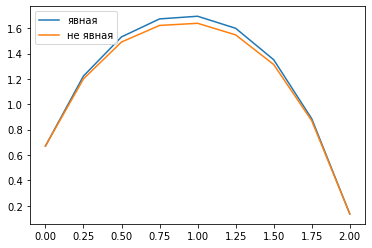

stop?: 


In [17]:
#def gen1(table1, table2):
#    for i in range(table3.shape[0]):
#        abc = yield (table1[i], table2[i])
#        print(abc)
            
#enu = gen1(table1, table2)
for i, (ar1, ar2) in enumerate(zip(table1, table2)):
    clear_output()
    #ar1, ar2 = next(enu)
    plt.plot(args['list_x'], ar1, label=f"явная")
    plt.plot(args['list_x'], ar2, label=f"не явная" )
    plt.legend(loc='upper left')
    print("шаг h=%d, шаг t=%f" % (args['hh'], args['tt']))
    print("шаг[%d] t=%f" %(i+1, args['list_tt'][i]))
    plt.show()   
    #display(*solve1(zad1, n))
    if(input("stop?: ") != ''):
        break


шаг h=0, шаг t=0.100000
шаг[4] t=0.300000, n=18


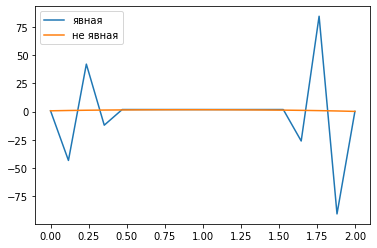

stop?: q


In [11]:
m, n = 5, 3
for i in itertools.count():
    clear_output()
    ar1, ar2, args2 = get_tables(m, n)
    plt.plot(args2['list_x'], ar1[m-1], label=f"явная")
    plt.plot(args2['list_x'], ar2[m-1], label=f"не явная" )
    plt.legend(loc='upper left')
    print("шаг h=%d, шаг t=%f" % (args2['hh'], args2['tt']))
    print("шаг[%d] t=%f, n=%d" %(i+1, args2['list_tt'][i], n))
    plt.show()   
    #display(*solve1(zad1, n))
    if(input("stop?: ") != ''):
        break
    n += 5